In [215]:
import pandas as pd, geopandas as gpd, os, numpy as np, matplotlib.pyplot as plt, os, functools as func

In [2]:
print ("testing")

testing


In [21]:
#read in spatial data, project to NAD83/Massachusetts Mainland 
zcta = gpd.read_file(str(os.getcwd()) + r'/vector/Census/tl_2010_25_zcta510/tl_2010_25_zcta510.shp').to_crs('epsg:26986')
tract = gpd.read_file(str(os.getcwd()) + r'/vector/Census/tl_2020_25_tract/tl_2020_25_tract.shp').to_crs('epsg:26986')
MBTA_stops = gpd.read_file(str(os.getcwd()) + r'/vector/MassDOT/MBTA_Bus_Stops/MBTA_Bus_Stops.shp').to_crs('epsg:26986')
MBTA_bound = gpd.read_file(str(os.getcwd()) + r'/vector/MassDOT/MPO_Boundaries/MPO_Boundaries.shp').to_crs('epsg:26986')

Zip Code Tabulation Area


,STATEFP10,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,PARTFLG10,geometry
0,25,02536,2502536,B5,G6350,S,71696166,9066635,+41.5969756,-070.5678768,N,"POLYGON ((275712.154 812608.480, 275688.314 81..."
1,25,02556,2502556,B5,G6350,S,10034104,1164445,+41.6394454,-070.6245149,N,"POLYGON ((273020.046 818874.990, 272816.173 81..."
2,25,02540,2502540,B5,G6350,S,27746696,4550024,+41.5741900,-070.6282848,N,"POLYGON ((273020.046 818874.990, 273126.263 81..."


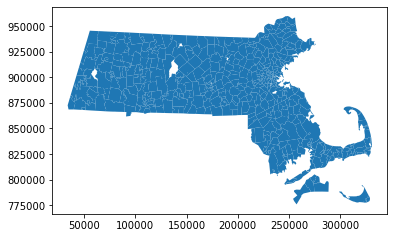

In [34]:
print ("Zip Code Tabulation Area")
zcta.plot()
zcta.head(3)

Census Tracts


,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,25,009,265102,25009265102,2651.02,Census Tract 2651.02,G5020,S,16318373,134252,+42.7338220,-070.9600766,"POLYGON ((241690.476 942724.067, 241691.940 94..."
1,25,009,268200,25009268200,2682,Census Tract 2682,G5020,S,10737361,364499,+42.8117773,-070.9054643,"POLYGON ((247411.399 949096.470, 247413.249 94..."
2,25,009,268400,25009268400,2684,Census Tract 2684,G5020,S,3065747,4715475,+42.8054407,-070.8329685,"POLYGON ((251091.605 949888.990, 251092.158 94..."


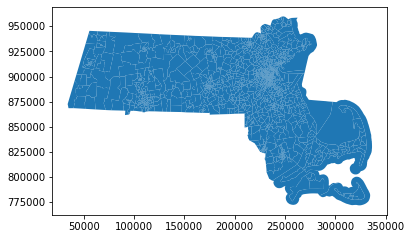

In [24]:
print ("Census Tracts")
tract.plot()
tract.head(3)

MBTA Bus Stops


,OBJECTID,STOP_ID,STOP_NAME,TOWN,TOWN_ID,geometry
0,1,3077,Gallivan Blvd @ opp Marsh St,BOSTON,35,POINT (237120.669 892643.408)
1,2,841,Lagrange St @ Virgil Rd,BOSTON,35,POINT (227915.195 892644.017)
2,3,446,Norfolk St @ Nelson St,BOSTON,35,POINT (234385.661 892644.944)


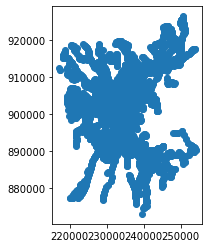

In [32]:
print("MBTA Bus Stops")
MBTA_stops.plot()
MBTA_stops.head(3)


MBTA Boundary


,OBJECTID,MPO,created_us,created_da,last_edite,last_edi_1,GlobalID,ShapeSTAre,ShapeSTLen,geometry
0,2,Berkshire,None,1970-01-01,None,1970-01-01,{08FDA544-18B0-412A-B442-287E53E987F7},2.451015e+09,2.471530e+05,"POLYGON ((75297.459 944507.604, 75164.087 9402..."
1,3,Cape Cod,None,1970-01-01,None,1970-01-01,{B6CD90CF-2F7D-43F2-B251-FA7F8E00EF01},1.067067e+09,1.288227e+06,"MULTIPOLYGON (((308049.454 871047.579, 308304...."
2,4,Central Massachusetts,None,1970-01-01,None,1970-01-01,{CC777E14-53C8-42AD-B421-71444DA0BB60},2.487546e+09,2.683265e+05,"POLYGON ((186779.317 907537.304, 189264.607 90..."


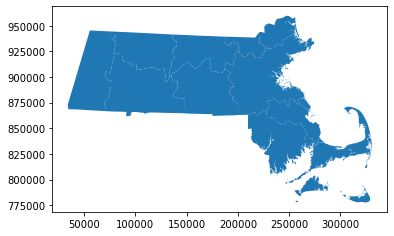

In [36]:
print("MBTA Boundary")
MBTA_bound.plot()
MBTA_bound.head(3)

In [178]:
#read in tabular data
hh_fam = pd.read_csv(str(os.getcwd()) + r'/tabular/ACSST5Y2019.S1101/ACSST5Y2019.S1101_data_with_overlays.csv')
enroll= pd.read_csv(str(os.getcwd()) + r'/tabular/ACSST5Y2019.S1401/ACSST5Y2019.S1401_data_with_overlays_2021-05-03T211502.csv')
finan = pd.read_csv(str(os.getcwd()) + r'/tabular/ACSST5Y2019.S2503/ACSST5Y2019.S2503_data_with_overlays.csv')


In [216]:

def get_column(path,col,rename_col):
    '''
    Isolates one column of interest from a dataframe and its corresponding GEO_ID,
    changes name from code to descriptive name
    '''
    df = pd.read_csv(str(os.getcwd()) + path)
    
    df= df.filter(['GEO_ID',col])#filter column of interest
    
    df = df.rename(columns={col:rename_col}) #change column name

    df= df.drop(df.index[0]) #rid of second row
    
    return df

#create dictionary in the following format: key= dataframe, value = list with two elements- code and descriptive name
d= {r'/tabular/ACSST5Y2019.S1101/ACSST5Y2019.S1101_data_with_overlays.csv': ['S1101_C02_005E','Fams_w_children_u18'],
    r'/tabular/ACSST5Y2019.S1401/ACSST5Y2019.S1401_data_with_overlays_2021-05-03T211502.csv': ['S1401_C03_003E','Kids_in_ps'],
    r'/tabular/ACSST5Y2019.S2503/ACSST5Y2019.S2503_data_with_overlays.csv': ['S2503_C04_011E','pct_making_100K_150k']}

#iterate through dictionary, add new dataframes to empty list
dfs= []
for key in d:
    print(key, '-> [', d[key][0], "|",d[key][1],"]")
    new_df = get_column(key,d[key][0],d[key][1])
    dfs.append(new_df)

#merge list of dataframes
merged = func.reduce(lambda  left,right: pd.merge(left,right,on=['GEO_ID'], how='outer'), dfs)
merged

/tabular/ACSST5Y2019.S1101/ACSST5Y2019.S1101_data_with_overlays.csv -> [ S1101_C02_005E | Fams_w_children_u18 ]
/tabular/ACSST5Y2019.S1401/ACSST5Y2019.S1401_data_with_overlays_2021-05-03T211502.csv -> [ S1401_C03_003E | Kids_in_ps ]
/tabular/ACSST5Y2019.S2503/ACSST5Y2019.S2503_data_with_overlays.csv -> [ S2503_C04_011E | pct_making_100K_150k ]


,GEO_ID,Fams_w_children_u18,Kids_in_ps,pct_making_100K_150k
0,8600000US01001,806,1901,22.9
1,8600000US01002,1171,2449,20.2
2,8600000US01003,0,0,0.0
3,8600000US01005,383,686,19.8
4,8600000US01007,1361,2227,24.2
...,...,...,...,...
532,8600000US02777,1259,2163,24.9
533,8600000US02779,651,1002,27.5
534,8600000US02780,2858,8259,22.4
535,8600000US02790,924,1842,24.6


In [207]:
#join dataframes

joined_mrg = joined.merge(joined_aggd, left_on='neighbourhood_left', right_on = 'neighbourhood_left')


[             GEO_ID Fams_w_children_u18
 1    8600000US01001                 806
 2    8600000US01002                1171
 3    8600000US01003                   0
 4    8600000US01005                 383
 5    8600000US01007                1361
 ..              ...                 ...
 533  8600000US02777                1259
 534  8600000US02779                 651
 535  8600000US02780                2858
 536  8600000US02790                 924
 537  8600000US02791                   0
 
 [537 rows x 2 columns],
              GEO_ID Kids_in_ps
 1    8600000US01001       1901
 2    8600000US01002       2449
 3    8600000US01003          0
 4    8600000US01005        686
 5    8600000US01007       2227
 ..              ...        ...
 533  8600000US02777       2163
 534  8600000US02779       1002
 535  8600000US02780       8259
 536  8600000US02790       1842
 537  8600000US02791         30
 
 [537 rows x 2 columns],
              GEO_ID inc_100K_150k
 1    8600000US01001          22.9


In [ ]:


hh_fam = hh_fam.filter(['GEO_ID','S1101_C02_005E'])#isolate column of interests

real_name = 'Married-couple familes with own children under 18 years' #change column name
hh_fam = hh_fam.rename(columns={'S1101_C02_005E':real_name})

hh_fam= hh_fam.drop(hh_fam.index[0]) #rid of second row
hh_fam

School enrollment


,GEO_ID,NAME,S1401_C01_001E,S1401_C01_001M,S1401_C01_002E,S1401_C01_002M,S1401_C01_003E,S1401_C01_003M,S1401_C01_004E,S1401_C01_004M,...,S1401_C06_030E,S1401_C06_030M,S1401_C06_031E,S1401_C06_031M,S1401_C06_032E,S1401_C06_032M,S1401_C06_033E,S1401_C06_033M,S1401_C06_034E,S1401_C06_034M
0,id,Geographic Area Name,Estimate!!Total!!Population 3 years and over e...,Margin of Error!!Total!!Population 3 years and...,Estimate!!Total!!Population 3 years and over e...,Margin of Error!!Total!!Population 3 years and...,Estimate!!Total!!Population 3 years and over e...,Margin of Error!!Total!!Population 3 years and...,Estimate!!Total!!Population 3 years and over e...,Margin of Error!!Total!!Population 3 years and...,...,Estimate!!Percent in private school!!Populatio...,Margin of Error!!Percent in private school!!Po...,Estimate!!Percent in private school!!Populatio...,Margin of Error!!Percent in private school!!Po...,Estimate!!Percent in private school!!Populatio...,Margin of Error!!Percent in private school!!Po...,Estimate!!Percent in private school!!Populatio...,Margin of Error!!Percent in private school!!Po...,Estimate!!Percent in private school!!Populatio...,Margin of Error!!Percent in private school!!Po...
1,8600000US01001,ZCTA5 01001,3583,461,434,149,2084,380,128,103,...,53.2,19.3,(X),(X),57.0,27.9,(X),(X),50.3,26.0
2,8600000US01002,ZCTA5 01002,15652,772,369,120,2995,368,244,93,...,26.8,4.7,(X),(X),21.8,6.1,(X),(X),31.1,5.7
3,8600000US01003,ZCTA5 01003,11305,476,0,19,0,19,0,19,...,9.4,2.2,(X),(X),4.6,1.4,(X),(X),14.5,3.7
4,8600000US01005,ZCTA5 01005,1278,341,13,23,925,274,19,31,...,40.9,30.6,(X),(X),32.7,48.6,(X),(X),44.2,35.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,8600000US02777,ZCTA5 02777,3099,322,215,95,2388,275,157,129,...,24.4,26.1,(X),(X),14.6,23.6,(X),(X),32.1,41.4
534,8600000US02779,ZCTA5 02779,1597,227,55,50,1166,166,83,52,...,0.0,22.0,(X),(X),0.0,35.8,(X),(X),0.0,37.9
535,8600000US02780,ZCTA5 02780,11884,715,823,233,8596,652,569,169,...,17.3,9.2,(X),(X),11.0,11.1,(X),(X),21.6,13.1
536,8600000US02790,ZCTA5 02790,3126,327,100,58,2228,284,113,96,...,11.6,11.8,(X),(X),10.3,13.0,(X),(X),14.1,17.6


In [ ]:
print ('Financial characteristics')
finan.head(3)